In [2]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

### We will use two functions imported from read_data: get_fn_list() and build_tables().
### Build tables takes a filename to one an output file from a simulation and turns it into an astropy table.
### If we want a list of filenames, we can use the function get_fn_list(), which takes as inputs the directory
### to the outputs folder, the number of the first file we want to read, and the number of the last file. It then
### returns a list of the correct filenames which we can then feed to build_table().

In [3]:
pref = '../outputs/evolve_rmin60_rad_'
ngrid = 1000
tgrid = 10000
data_ngrid = 100
HoR=1e-3
full_data = build_data(pref,ngrid,tgrid,data_ngrid,convert=True,HoR=HoR,order=1)
print np.shape(full_data["r"])
#HoR = 1e-3
#full_data["sigma"] = full_data["L"]/full_data["r"]/HoR**2.

shape of tspace:  (10000,)
[  6.         6.172956   6.350897   6.533968   6.722315   6.916092
   7.115455   7.320565   7.531587   7.748692   7.972056   8.201858
   8.438284   8.681525   8.931778   9.189245   9.454134   9.726658
  10.00704   10.2955    10.59228   10.89761   11.21174   11.53493
  11.86744   12.20953   12.56148   12.92358   13.29611   13.67938
  14.07371   14.47939   14.89678   15.32619   15.76798   16.22251
  16.69014   17.17125   17.66622   18.17547   18.69939   19.23842
  19.79299   20.36354   20.95054   21.55445   22.17578   22.81502
  23.47268   24.14931   24.84543   25.56163   26.29846   27.05654
  27.83647   28.63889   29.46443   30.31377   31.18759   32.0866
  33.01153   33.96312   34.94214   35.94938   36.98565   38.0518
  39.14868   40.27717   41.4382    42.6327    43.86162   45.12598
  46.42678   47.76507   49.14194   50.55851   52.0159    53.51531
  55.05794   56.64504   58.27788   59.9578    61.68614   63.4643
  65.29372   67.17587   69.11228   71.10451   73.

read_data.py:182: RuntimeWarning: invalid value encountered in divide
  dQ1dpsi = dQ1dpsi/psi
read_data.py:187: RuntimeWarning: invalid value encountered in divide
  dQ2dpsi = dQ2dpsi/psi


(1000, 10000)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


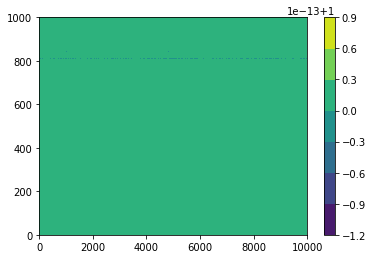

In [3]:
# should be 1 everywhere; verifies that the conversion from code to physical coordinates was done correctly

plt.contourf(full_data["t"][:,:]/full_data["T"][:,:])
plt.colorbar()

In [9]:
## check for mass conservation

init_mass = np.sum(full_data["sigma"][:,1]*2.*np.pi*full_data["r"][:,1]*full_data["dr"][:,1])
for i in range(tgrid):
    print ( np.sum(full_data["sigma"][:,i]*2.*np.pi*full_data["r"][:,i]*full_data["dr"][:,i]) - init_mass)/init_mass

0.008514131539883944
0.0
-0.0005170033652893035
-0.0017656454901348948
-0.0031370863922739567
-0.004090756458363681
-0.004719946985073778
-0.005662980721217465
-0.007064322313545967
-0.00741738394803584
-0.007630465319949699
-0.007919614471329946
-0.009568637405504472
-0.011502437458445322
-0.011850249819719872
-0.012487949150936963
-0.012720394660994018
-0.012716937189421662
-0.01672467254991478
-0.01880314159169399
-0.01769977238247873
-0.015315451502937009
-0.01671220859135409
-0.018187737559624228
-0.019570323133113486
-0.019956535868315823
-0.020484863805506327
-0.02019966212396458
-0.024744454718246645
-0.028621023049992585
-0.030575179292479118
-0.03000400260703933
-0.026115367377623256
-0.022123170097129916
-0.022221924609667112
-0.02744033637847761
-0.03126103013812061
-0.028809387488617614
-0.027146013006380247
-0.028460183292728758
-0.03030839602748892
-0.032655295360250206
-0.03435570344797701
-0.033906341347504476
-0.034817071615424904
-0.038744843661464065
-0.042682188593

-0.055053567797678164
-0.05568023680079947
-0.0563084180968154
-0.05692429547566955
-0.057528270269855394
-0.05811869517980236
-0.05870273103112573
-0.05927495200115532
-0.059855807600297135
-0.060430941353367434
-0.061017466666474195
-0.06160427547926985
-0.062194339961564614
-0.06277188012114414
-0.06334826188931304
-0.06390416161295952
-0.0644484210353447
-0.06497323994063174
-0.0655007324990146
-0.06602164126177326
-0.06655659108372629
-0.06709320285264576
-0.06764981603870235
-0.0682184246698579
-0.06880783803111738
-0.0694072798673455
-0.0700232270317332
-0.0706369199833155
-0.07125361503180151
-0.07186906811071392
-0.07247920900464293
-0.07308152002837458
-0.07368256746501162
-0.07427136395189816
-0.07485459892129225
-0.07542301707875945
-0.0759758475833969
-0.07650437677999677
-0.07701614786806157
-0.07749150997550781
-0.07794915919562273
-0.07836642965513498
-0.0787531674279198
-0.07908517545833862
-0.07937683597402086
-0.07960990241852299
-0.0797973567742819
-0.07992541410674

-0.10052156289185882
-0.100678388332682
-0.10083928423795901
-0.10100129921513525
-0.10116135611459469
-0.1013269664088763
-0.10149094255177808
-0.10165863943733466
-0.10183224551255712
-0.10201065527173797
-0.10219414549088
-0.1023836289658743
-0.102576233019175
-0.10277377344399218
-0.10297798315901588
-0.10318070116409524
-0.1033935871481979
-0.10360473654624894
-0.10382053584365601
-0.10404034929846152
-0.10425996084348707
-0.10448262767593802
-0.10470829948092385
-0.10493332942048239
-0.1051613631345705
-0.10539129965542002
-0.10562006480479033
-0.10585507337136149
-0.1060886480866454
-0.10632332279998886
-0.10656291825154597
-0.10680224571734968
-0.10704317974539022
-0.10728726074778817
-0.10753161021192349
-0.10777824729187178
-0.10802620303932119
-0.10827414091729419
-0.10852565054294645
-0.10877509153727836
-0.10902774569482625
-0.1092812355427377
-0.10953466160542313
-0.10978937200292967
-0.11004488209800888
-0.11029792111266434
-0.11055115376699705
-0.11080347162716776
-0.11

-0.24402702714904395
-0.2443088201443354
-0.24459312457465957
-0.24487855097637687
-0.2451623690601236
-0.24544579919591325
-0.24573287279148973
-0.2460180554219974
-0.24630206155249837
-0.2465893143952133
-0.24687556907717206
-0.24716125313115467
-0.24744778609322907
-0.2477353395093995
-0.2480219278046587
-0.2483081378182824
-0.2485965396904856
-0.24888395134660088
-0.24917045893692413
-0.24945878343799027
-0.24974620205598194
-0.25003370970117883
-0.2503213863769834
-0.2506091882238458
-0.25089636977674273
-0.25118345352036603
-0.2514716087711162
-0.25175847616329006
-0.25204573373074035
-0.2523333917570963
-0.2526203824271964
-0.2529072846118385
-0.25319483473614435
-0.2534811962513604
-0.2537675152635816
-0.254055189692279
-0.2543414183004087
-0.25462756765931405
-0.25491419852814673
-0.25520102928689237
-0.2554868532305032
-0.25577290653256474
-0.2560604664838336
-0.25634628611676663
-0.25663175773492397
-0.25691965138332373
-0.25720557751475115
-0.25749104081808166
-0.2577778966

-0.40220716995848543
-0.4023325660072641
-0.40245692303418945
-0.40258057918273793
-0.40270460233686683
-0.40282744255399067
-0.40294995921933685
-0.403072860744537
-0.40319439403629187
-0.403315368312226
-0.4034371727559876
-0.4035576738362464
-0.40367694245009944
-0.4037974557477093
-0.40391705002653056
-0.404035318177589
-0.4041538012971319
-0.4042722804785826
-0.40438971067238144
-0.4045071867979737
-0.4046235931875418
-0.40473994615538966
-0.4048566473960503
-0.4049717519242642
-0.40508615117753394
-0.4052017808250526
-0.4053164605005143
-0.40542925185484263
-0.40554311853382485
-0.40565712927485326
-0.4057696082814325
-0.40588133463071074
-0.4059941967450244
-0.40610610748812925
-0.4062178084933589
-0.40632841003008774
-0.4064396695027474
-0.4065510784812634
-0.4066618244874624
-0.40677077058911043
-0.40688151416236895
-0.4069925275646507
-0.4071012590170373
-0.4072101810580134
-0.4073211326140939
-0.40743054753810076
-0.4075386844867569
-0.40764819453334133
-0.40775726008251956


-0.44361456735803245
-0.44368090854802084
-0.4437470037740611
-0.44381316594579795
-0.44387892018769837
-0.4439446704272503
-0.4440099966158179
-0.44407559831657234
-0.4441405700298677
-0.4442055804609846
-0.44427015452445506
-0.4443350953906222
-0.44439951885686435
-0.4444638120734847
-0.44452770927702995
-0.44459200819725286
-0.44465590266097166
-0.44471954131707725
-0.44478265486012697
-0.44484621357143395
-0.44490936677946713
-0.4449723228151492
-0.44503469028004927
-0.4450976938362413
-0.44516024876270577
-0.44522272388524164
-0.4452845583158876
-0.4453471166821614
-0.4454092606849214
-0.44547126419825467
-0.4455327538673996
-0.4455949578173428
-0.4456569923561641
-0.44571868798784214
-0.4457799594869271
-0.44584188397495433
-0.4459038279989879
-0.44596550535025065
-0.4460267531583625
-0.44608853003733956
-0.44615038774730076
-0.4462120646715746
-0.44627328739353855
-0.4463348748454728
-0.4463965384350351
-0.44645805771002783
-0.44651926754907895
-0.44658063216927013
-0.4466420905

-0.4801489351374055
-0.4802255287053342
-0.48030218476529607
-0.4803786155874032
-0.4804551082208216
-0.48053166746725245
-0.4806082650118565
-0.4806848057405696
-0.4807613048272047
-0.4808377370274247
-0.4809142020091346
-0.480990578635867
-0.48106688947085
-0.48114325798435076
-0.48121969370348194
-0.4812962634822638
-0.4813727852273038
-0.4814492541284116
-0.48152571159465996
-0.48160217852016524
-0.481678636163983
-0.48175507376741633
-0.4818313840558006
-0.4819076963769916
-0.48198407337466503
-0.4820605051907809
-0.4821369990896552
-0.48221348927887414
-0.4822899886501484
-0.48236649700689094
-0.4824429296442101
-0.4825193953511735
-0.48259579123051266
-0.48267214702275174
-0.4827485378240543
-0.4828249316364963
-0.4829013817249387
-0.4829778375766575
-0.48305425001539654
-0.4831306578828859
-0.48320706681407083
-0.48328345569195674
-0.4833598535081404
-0.48343613965255755
-0.483512432979231
-0.48358873670891717
-0.4836651278444012
-0.48374157239263327
-0.48381796465415805
-0.483

-0.5261205745268098
-0.5261837519711631
-0.5262467761144356
-0.5263097229958518
-0.526372725919583
-0.5264359317560714
-0.5264991533735389
-0.5265620835362743
-0.5266250694194688
-0.5266880924171602
-0.5267511740262962
-0.5268141883451979
-0.5268770553736724
-0.526939801422947
-0.5270025479087639
-0.5270653516871356
-0.5271282234606074
-0.5271909541518647
-0.5272535143166093
-0.5273161523352365
-0.5273788413491926
-0.5274415857284085
-0.5275044300992692
-0.5275671543944848
-0.527629630513161
-0.5276919622621296
-0.5277543899130046
-0.527816884526413
-0.5278792006658594
-0.5279413286739553
-0.5280036805676309
-0.528066058857919
-0.5281284560129964
-0.5281908509393558
-0.5282531412696378
-0.5283153060707537
-0.5283773370693454
-0.5284394073789469
-0.528501602972447
-0.5285637508740423
-0.5286257567391794
-0.5286877863396836
-0.528749718441649
-0.5288117080268351
-0.5288737843917691
-0.528935768025854
-0.5289976814347706
-0.5290595558455136
-0.5291214501189615
-0.5291833252379171
-0.52924

-0.5553798106960524
-0.5554329320080202
-0.5554862648118531
-0.5555392161995713
-0.5555918886046344
-0.5556447360742405
-0.5556975335223112
-0.5557499870527406
-0.5558024454164617
-0.5558553361079847
-0.5559085399344698
-0.5559614507623111
-0.5560140830991793
-0.5560669345703821
-0.5561200596810546
-0.5561727690215322
-0.5562251918285565
-0.55627777128256
-0.5563305493246044
-0.5563832096390472
-0.5564356616732246
-0.5564882674552334
-0.5565409235349579
-0.5565934634400826
-0.5566457744259895
-0.5566984058489788
-0.5567513288241446
-0.55680409543668
-0.5568565759599285
-0.5569089837947071
-0.5569613156542921
-0.5570137068922392
-0.5570659495845417
-0.557118249341925
-0.5571706144774523
-0.5572231611075065
-0.5572757101651444
-0.5573282225337348
-0.5573806628865524
-0.5574329145413696
-0.5574851009504899
-0.5575372426926976
-0.5575894381455803
-0.5576418019356083
-0.557694342998187
-0.5577465040205987
-0.5577986353043839
-0.5578507717590968
-0.5579029908280645
-0.5579551719294584
-0.558

-0.5801250262535887
-0.5801705553409142
-0.5802161023018093
-0.5802617356286576
-0.5803075006667031
-0.5803532468839311
-0.5803988300108717
-0.5804444856120976
-0.5804903395294543
-0.5805359236381418
-0.5805814745870111
-0.5806268905098935
-0.5806724922201315
-0.5807182268005501
-0.5807638132405141
-0.5808092581890716
-0.5808547794224147
-0.5809004013314576
-0.5809460163968895
-0.5809912370095259
-0.5810363984986775
-0.5810816050660494
-0.5811273712825928
-0.5811729012573751
-0.5812183925122032
-0.5812638673315564
-0.5813094477426515
-0.5813549740840914
-0.5814002975883971
-0.5814457503649937
-0.5814912393552474
-0.5815365959569458
-0.5815816939343428
-0.5816265179591626
-0.5816713889446473
-0.5817164608682611
-0.5817617057241471
-0.5818071365064229
-0.5818526869015062
-0.5818981573112897
-0.5819435652422571
-0.5819890205027701
-0.5820344204625435
-0.5820796084592178
-0.5821248196427753
-0.5821697087221164
-0.582214537514378
-0.5822593026416966
-0.5823039495613613
-0.5823487571349545
-

-0.605617632319077
-0.6056566762920665
-0.6056959040863674
-0.6057347243772162
-0.6057738217085905
-0.6058127511623758
-0.6058515413147282
-0.6058903432711393
-0.6059291753306156
-0.6059680582880723
-0.6060069100729125
-0.6060457643089313
-0.6060847592321298
-0.6061239822126611
-0.606163103070189
-0.606201976255546
-0.6062409343788185
-0.6062801644611916
-0.6063190405682808
-0.6063578797451851
-0.606396418653757
-0.6064351278607428
-0.6064737398292342
-0.6065123526595106
-0.6065513058766698
-0.6065903304716591
-0.6066293474215686
-0.6066682141474211
-0.6067070301278445
-0.606745844928992
-0.6067847311061909
-0.6068235430030336
-0.6068625125822928
-0.6069013618851907
-0.6069403366279705
-0.606979221993979
-0.607018102736471
-0.6070566331737786
-0.6070949729679072
-0.6071335466364555
-0.6071721005869474
-0.6072106978250982
-0.6072495882222622
-0.607288641745008
-0.6073277458122018
-0.6073666014881101
-0.6074053217402857
-0.6074438776651268
-0.6074824360189555
-0.6075210632292918
-0.60755

-0.6247804968604038
-0.624815032847194
-0.6248496435980356
-0.6248842785131035
-0.6249190000728213
-0.6249536587319746
-0.6249883205170791
-0.6250227115601187
-0.6250569638878037
-0.6250913261691732
-0.625125876438283
-0.6251605130701757
-0.6251954409492896
-0.6252304492545415
-0.6252653566235222
-0.6253000043044403
-0.6253344112939598
-0.6253688922514514
-0.6254032956095116
-0.6254377833237754
-0.6254719171416305
-0.6255062074214546
-0.625540725763827
-0.6255751946599472
-0.6256097448985201
-0.6256442010966694
-0.6256787400586177
-0.6257132126705692
-0.6257477214573747
-0.6257822936890932
-0.6258167134923392
-0.6258512715716108
-0.6258855064396134
-0.625919630559751
-0.6259535405001305
-0.6259879708871245
-0.6260224435659725
-0.6260571858009134
-0.6260917618083199
-0.6261261795031416
-0.6261604101444554
-0.6261947044190265
-0.6262289726658237
-0.6262631452412979
-0.6262976364781676
-0.6263319400553956
-0.6263659596393706
-0.6264000770323142
-0.6264341858044035
-0.6264683116182403
-0.6

-0.6418030350992351
-0.6418341833841786
-0.6418648742353044
-0.6418955326706955
-0.6419263829396158
-0.6419574010199025
-0.641988875761508
-0.6420201691940104
-0.6420513129484129
-0.6420824646765481
-0.6421136396862985
-0.6421448817934955
-0.6421757122307853
-0.6422064429956841
-0.6422371399862519
-0.6422680421940683
-0.6422990012217252
-0.6423299213831823
-0.6423608973419992
-0.6423919011001801
-0.642423020155502
-0.6424541560107626
-0.6424849269252639
-0.6425157459084956
-0.6425470205959277
-0.6425783935282974
-0.6426095845829066
-0.6426402844214506
-0.6426708773849245
-0.6427013409011384
-0.6427319651514367
-0.6427625489595229
-0.6427929380429743
-0.6428236193125314
-0.6428546080476928
-0.6428856805571015
-0.6429167775564406
-0.6429481983318533
-0.6429794509746017
-0.6430107616143715
-0.6430415828007804
-0.6430722361209503
-0.643102510600039
-0.6431329213222183
-0.6431634371706473
-0.6431938046036851
-0.6432243065803166
-0.6432549651054836
-0.6432857738552678
-0.6433167341919994
-0.

-0.6566171057042222
-0.6566443234956866
-0.6566718075232534
-0.6566996995935704
-0.6567277812543415
-0.6567554964721061
-0.656782846471699
-0.6568103582422614
-0.6568379118671502
-0.6568656302272025
-0.6568938918084116
-0.656921182983446
-0.6569483693519224
-0.6569760638509917
-0.6570039789790588
-0.6570319586593425
-0.65705964530304
-0.657087334856486
-0.6571148267848187
-0.6571422821140074
-0.6571703967793744
-0.6571978599151469
-0.6572253588258027
-0.6572531656204891
-0.6572810060124942
-0.6573085018389211
-0.6573357087295792
-0.6573630278629722
-0.6573903600377682
-0.6574180811274509
-0.6574461227651633
-0.657473462797372
-0.657500390360782
-0.6575280167291935
-0.657555819071046
-0.6575833937705625
-0.6576109297232228
-0.6576387271235519
-0.6576663416680812
-0.6576941261227479
-0.6577221725499687
-0.6577498386084462
-0.6577772188346299
-0.6578049409298414
-0.6578326616683128
-0.6578597821179878
-0.6578870193468755
-0.657914423118923
-0.657941787916084
-0.6579696782120451
-0.6579975

-0.671461949473173
-0.671487818541413
-0.6715136645672809
-0.6715393741734241
-0.6715652126172098
-0.6715912057484273
-0.6716172838957284
-0.6716432904052865
-0.6716693125018245
-0.6716952045145986
-0.6717209716027701
-0.671746675301348
-0.671772479994362
-0.6717982312272256
-0.6718239552315669
-0.6718499392294308
-0.6718758265924868
-0.6719014570871262
-0.6719271018800026
-0.6719527519712801
-0.6719784244684043
-0.6720040873324923
-0.6720298728199363
-0.6720555968118207
-0.6720814538965993
-0.6721075534769639
-0.6721336100289117
-0.6721596299128569
-0.672185608342279
-0.6722116173264995
-0.6722374391347323
-0.6722631920743094
-0.6722889095323115
-0.6723145359469758
-0.672340041495232
-0.6723655954905746
-0.6723909517077552
-0.6724163022577485
-0.672441978453376
-0.6724677486715976
-0.6724935217699809
-0.6725192300054099
-0.6725449757648498
-0.6725710069016304
-0.6725970212217188
-0.6726228702734616
-0.672648865348919
-0.6726748342684962
-0.6727007071541933
-0.6727263415274379
-0.67275

-0.6839475134966436
-0.6839717472020732
-0.6839958334431927
-0.6840198446200411
-0.6840439324950973
-0.6840680693243156
-0.6840922646266359
-0.6841165569317517
-0.6841408697947198
-0.6841652872920226
-0.6841896092085391
-0.6842138466353965
-0.6842379976516232
-0.6842623632468251
-0.6842866362985611
-0.6843105925865948
-0.6843345423890389
-0.6843586002743063
-0.6843830744449929
-0.6844076564864402
-0.6844320929387263
-0.6844567118058482
-0.68448133516146
-0.6845059019682338
-0.6845302388911166
-0.6845543086629143
-0.6845784027524591
-0.6846026173416592
-0.6846264902895745
-0.6846502830319394
-0.6846740233082491
-0.6846979064038821
-0.6847220396495909
-0.6847461382680496
-0.6847702679354833
-0.6847947931073829
-0.6848194606446181
-0.6848441600005701
-0.6848687474060297
-0.6848931701562017
-0.6849174767339318
-0.6849416951068853
-0.6849657031813526
-0.6849895545337765
-0.6850133998208742
-0.6850372024321497
-0.6850612314399945
-0.6850851797791071
-0.6851092774828654
-0.6851336244071858
-0

-0.69710393005675
-0.6971265151319433
-0.6971493614154322
-0.6971720612900917
-0.6971950099239484
-0.6972178212114789
-0.6972404910045739
-0.6972632501294483
-0.697286109750487
-0.6973088994872604
-0.6973317491908693
-0.6973545540115421
-0.6973773184870987
-0.6974001654073734
-0.6974229558519327
-0.6974456071549242
-0.697468271986066
-0.6974907924308504
-0.6975133338638078
-0.6975359478737371
-0.6975585713431518
-0.6975813373262466
-0.697603996295219
-0.6976266134929423
-0.6976493272334234
-0.6976720445825716
-0.6976946707277981
-0.6977175577847582
-0.6977406063313876
-0.6977634032197425
-0.6977860825819892
-0.6978085818800245
-0.6978310697476012
-0.6978536697665262
-0.6978762973813836
-0.6978990130581701
-0.6979215406673062
-0.697944207908868
-0.6979669837378426
-0.6979898234759214
-0.6980124233334672
-0.6980350729613716
-0.6980577109708599
-0.6980803085730833
-0.6981028560823717
-0.6981255479502073
-0.6981482929711718
-0.698171205187081
-0.6981940502773522
-0.6982166276345737
-0.6982

-0.709565918528622
-0.7095874970589571
-0.7096088523108879
-0.7096302420604297
-0.709651632965647
-0.7096730222829138
-0.7096944709588672
-0.7097158949131317
-0.7097372934275753
-0.7097588747892081
-0.7097803047807321
-0.7098019438436763
-0.7098236702187034
-0.7098454707568367
-0.7098670263768362
-0.7098885906430057
-0.7099099392014692
-0.7099311335550927
-0.7099522161838446
-0.7099732448292555
-0.709994206047878
-0.710015330840589
-0.7100366247933727
-0.7100578528058034
-0.7100791906740684
-0.7101010127455196
-0.7101231697702691
-0.7101453114650268
-0.7101670992981078
-0.7101887345026606
-0.7102101798740678
-0.7102313644656157
-0.7102523838744721
-0.7102732912073625
-0.7102941053777257
-0.7103150521591377
-0.7103362142714471
-0.7103573370480133
-0.71037871386535
-0.7104003248344033
-0.7104222999906582
-0.7104443439812328
-0.7104664106336845
-0.7104882987246549
-0.710509793615722
-0.7105310752124366
-0.7105524963844427
-0.7105735738495585
-0.7105943627478962
-0.7106150858466527
-0.7106

-0.7212396459530588
-0.721259780469196
-0.7212797892780807
-0.7213002569510343
-0.7213204975874107
-0.7213408061070811
-0.7213609960802497
-0.721381149646135
-0.7214011545858844
-0.7214209202226273
-0.7214410042382015
-0.7214613309402873
-0.7214815470643728
-0.7215016335335294
-0.721521582471216
-0.7215412798026707
-0.7215614993990547
-0.7215819618597338
-0.7216024412932284
-0.721622871749121
-0.721643425378861
-0.7216641466930351
-0.7216843662114983
-0.7217041802116382
-0.7217237812411197
-0.7217436486949953
-0.7217637124646697
-0.7217836682564444
-0.7218034609677201
-0.7218231993381579
-0.72184299747115
-0.721863500534147
-0.721883679068731
-0.7219038897354313
-0.7219242141453365
-0.7219447654403969
-0.7219650453245068
-0.721985097109045
-0.7220051224322036
-0.7220252323365345
-0.7220453808482623
-0.7220652199913569
-0.7220848702136838
-0.7221044644956369
-0.7221243320060514
-0.7221445547220491
-0.7221649359394482
-0.7221854176540001
-0.7222058664982224
-0.7222264554915582
-0.7222467

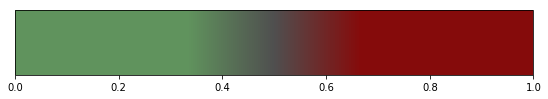

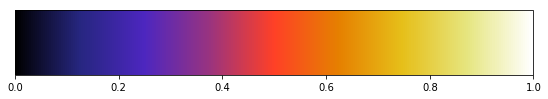

In [5]:
# construct custom colormap for Bernoulli number
from matplotlib.colors import LinearSegmentedColormap
from colour import Color

c3 = '#850B0B'
c2 = '#4F4F4F'
c1 = '#60935D'
clist =  list(Color(c1).range_to(Color(c1),4))[:-1]
clist += list(Color(c2).range_to(Color(c2),2))[:-1]
clist += list(Color(c3).range_to(Color(c3),4))[:-1]

for k in range(len(clist)):
    clist[k] = str(clist[k])
cm = LinearSegmentedColormap.from_list('my_cmap', clist, N=256)

## compare to CMRmap

# our cmap
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cm)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()

# cmr map
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=plt.get_cmap("CMRmap"))
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)

          mdot         
-----------------------
                    0.0
    -235.75028975076697
    -27.429190231684924
    -7.3041598912806585
     -2.298392351319733
    -0.5862532197091435
    -0.2073910289256691
    -0.0705866090568502
      10.53287981220559
     6.2869393402501075
                    ...
-1.7155633590618807e-11
-1.7086879122709634e-11
-1.7051618916127834e-11
 -1.703405246967768e-11
-1.6943484750756927e-11
-1.6953859352857037e-11
 -1.687818521805975e-11
-1.6859844321452265e-11
-1.6834916550786782e-11
-1.6744980406179567e-11
-1.6742719937481927e-11
Length = 10000 rows


(-1, 1)

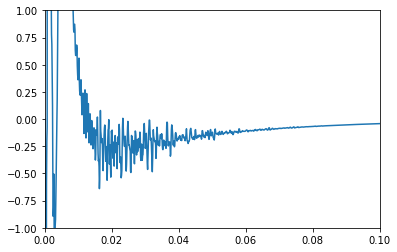

In [27]:
plot_mdot = full_data["mdot"][5,:]
print plot_mdot
plot_t = full_data["t"][5,:]
plot_t = plot_t/np.max(plot_t)
plt.plot(plot_t,plot_mdot)
plt.xlim(0.0,0.1)
#plt.yscale('log')
plt.ylim(-1,1)

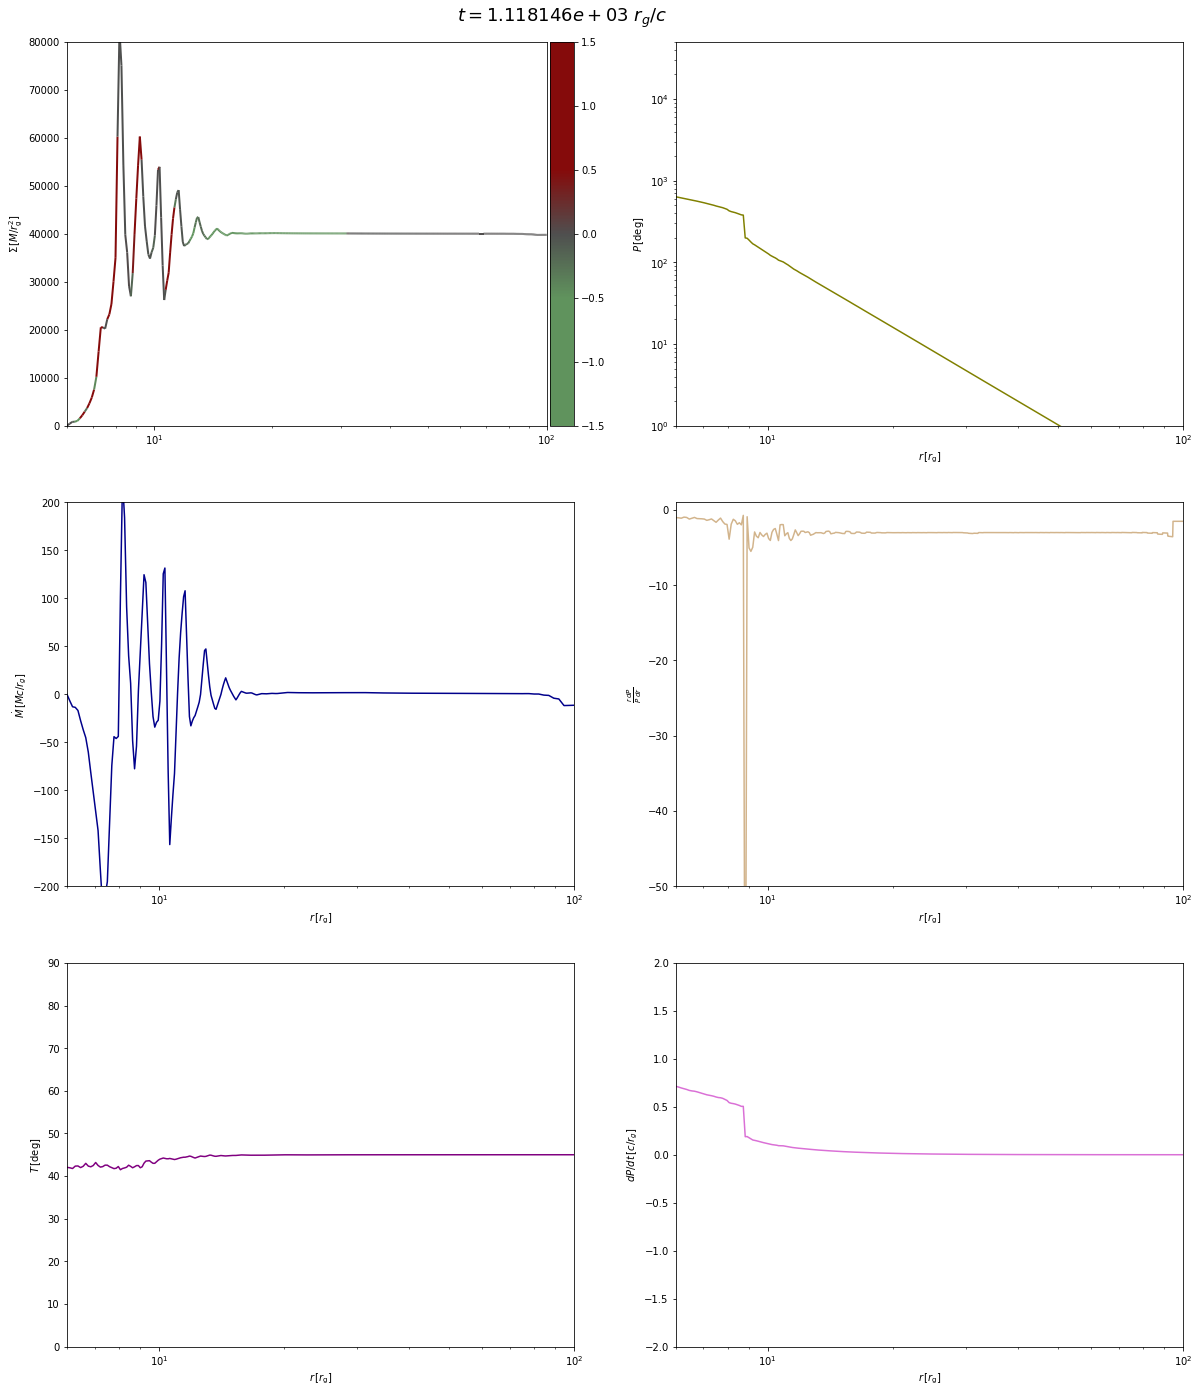

'for i in range(5000,5200,50):\n    fig = plot_interface(full_data,i)\n    plt.show()'

In [27]:
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_interface(table,ind):
    plot_r = table["r"][:,ind]
    plot_d = table["sigma"][:,ind]
    plot_t = table["tilt"][:,ind]
    plot_s = table["s"][:,ind]
    plot_p = table["prec"][:,ind]
    plot_rdpdr = table["rdpdr"][:,ind]/plot_p
    plot_dpdt  = table["dpdt"][:,ind]
    plot_mdot  = table["mdot"][:,ind]
    
    time = np.average(table["t"][:,ind])

    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))

    points = np.array([plot_r, plot_d]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cm,
        norm=plt.Normalize(-1.5,1.5))
    lc.set_array(plot_s)
    lc.set_linewidth(2)

    plot = ax[0][0].add_collection(lc)
    ax[0][0].set_ylabel(r'$\Sigma\,[M/r_{\rm g}^2]$')
    ax[0][0].set_xlim(rmin,rmax)
    ax[0][0].set_ylim(0,8e4)
    ax[0][0].set_xscale('log')
    divider = make_axes_locatable(ax[0][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
    ax[1][0].plot(plot_r,plot_mdot,color='darkblue')
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$\dot{M}\,[Mc/r_g]$')
    ax[1][0].set_ylim(-2e2,2e2)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')

    ax[2][0].plot(plot_r,plot_t,color='purple')
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[2][0].set_ylim(0,90)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')

    ax[0][1].plot(plot_r,plot_p,color='olive')
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$P\,[{\rm deg}]$')
    ax[0][1].set_ylim(1,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    ax[0][1].set_yscale('log')

    ax[1][1].plot(plot_r,plot_rdpdr,color='tan')
    ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][1].set_ylabel(r'$\frac{r}{P}\frac{dP}{dr}$')
    ax[1][1].set_ylim(-50,1)
    ax[1][1].set_xlim(rmin,rmax)
    ax[1][1].set_xscale('log')

    ax[2][1].plot(plot_r,plot_dpdt,color='orchid')
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$dP/dt\,[c/r_g]$')
    ax[2][1].set_ylim(-2,2)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    
    #title = "t = %s"
    plt.title(r"$t = %e \,\,r_g/c$" % time,fontsize=18,pad=20)
    
    return fig
#fig = plot_interface(full_data,5000)
#plt.savefig('alignment_front_early.png')
#plt.show()
fig = plot_interface(full_data,2)
plt.show()
'''for i in range(5000,5200,50):
    fig = plot_interface(full_data,i)
    plt.show()'''

### Lets make a plotting interface, which we can test for one of our tables. 

### Lets say we want to plot the quantities as a movie. We do this by making .png frames of each snapshot and then combining them into a movie using ffmpeg. 
### We iterate through each table that we have generated, then we use our plotting interface to get the figure from matplotlib that we want. 
### Then, we just save this as a series of .png files. From command line, we can do this using ffmpeg, for instance:
### "ffmpeg -r 5 -s 1920x1080 -i tilt_%03d.png test.mp4"
### -r sets the frames per second; -s sets the resolution; -i sets the files we want to read, where %03d indicates we're look for integers of length 3, i.e. 1 --> 001, 10 --> 010, etc; and then test.mp4 is just the name of our file.
### We can do this interactively in jupyter notebook (auto = 1) and remove the .png files afterwards, if we want, as well (clean = 1)

In [14]:
print range(0,10000,50)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 85

In [28]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/inner_a1_h02_plm_6panel_short"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,1000,2):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface(full_data,i)
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>